In [262]:
#First step is to import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN, SMOTETomek
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import os
import streamlit as st
import plotly.express as px


# To handle warnings
import warnings
warnings.filterwarnings('ignore')

In [263]:
# Loading the dataset into pandas Dataframe.
# Load feature names
features = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
feature_names = features.iloc[:, 1].values
len(feature_names)

561

In [264]:
# Load activity labels
activity_labels = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None)
activity_labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [265]:
# Load training data
X_train = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = feature_names
Y_train = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
Y_train.columns = ['Activity']

In [266]:
X_train, Y_train

(      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
 0              0.288585          -0.020294          -0.132905   
 1              0.278419          -0.016411          -0.123520   
 2              0.279653          -0.019467          -0.113462   
 3              0.279174          -0.026201          -0.123283   
 4              0.276629          -0.016570          -0.115362   
 ...                 ...                ...                ...   
 7347           0.299665          -0.057193          -0.181233   
 7348           0.273853          -0.007749          -0.147468   
 7349           0.273387          -0.017011          -0.045022   
 7350           0.289654          -0.018843          -0.158281   
 7351           0.351503          -0.012423          -0.203867   
 
       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
 0            -0.995279         -0.983111         -0.913526         -0.995112   
 1            -0.998245         -0.975300   

In [267]:
# Load testing data
X_test = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = feature_names
Y_test = pd.read_csv('/Users/nehadudeja/Desktop/Dissertation project/human+activity+recognition+using+smartphones /UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
Y_test.columns = ['Activity']

In [268]:
# Combine training and test sets for EDA
data = pd.concat([X_train, X_test], axis=0)
labels = pd.concat([Y_train, Y_test], axis=0)

Exploratory Data Analysis

In [269]:
# Understanding the imbalance nature of the dataset.
# Map the activity labels to their names
activity_map = dict(activity_labels.values)
labels['ActivityName'] = labels['Activity'].map(activity_map)

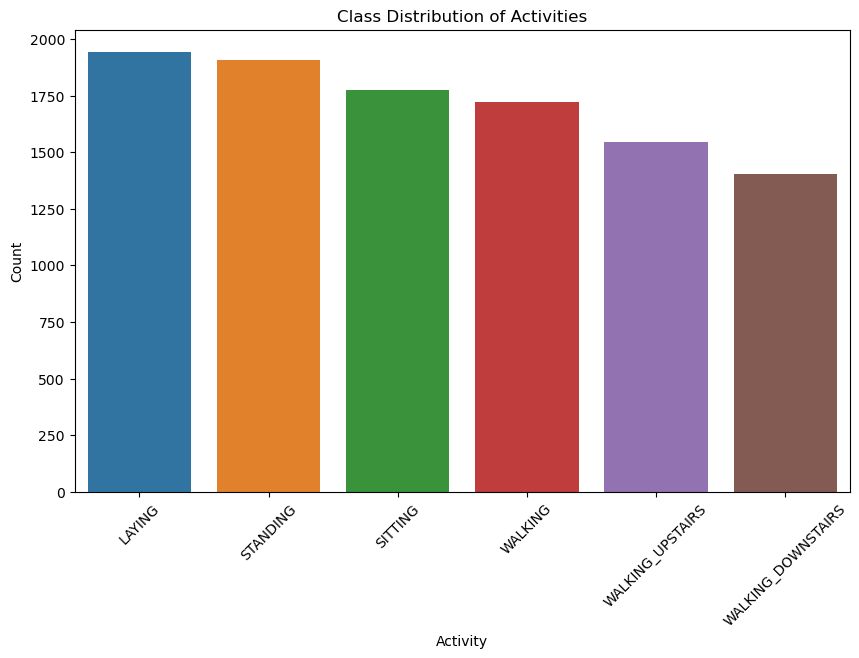

In [270]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='ActivityName', data=labels, order=labels['ActivityName'].value_counts().index)
plt.title('Class Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


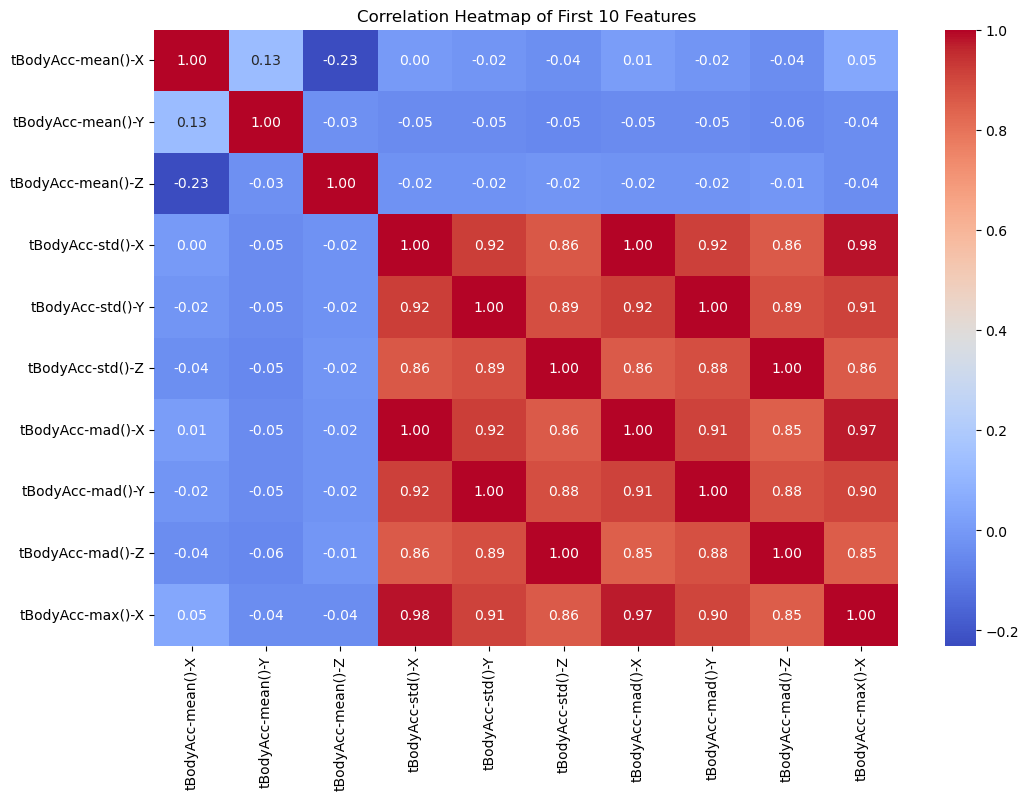

In [271]:
# Exploring the correlation between the features
# Compute correlation matrix for a subset of features
subset_features = feature_names[:10]  # Taking the first 10 features for visualization
corr_matrix = data[subset_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of First 10 Features')
plt.show()

Observation: The red colour indicates that features are higly correlated. Blue colour indicates that they are negatively co related. We can observe that some of the features are highly correlated,

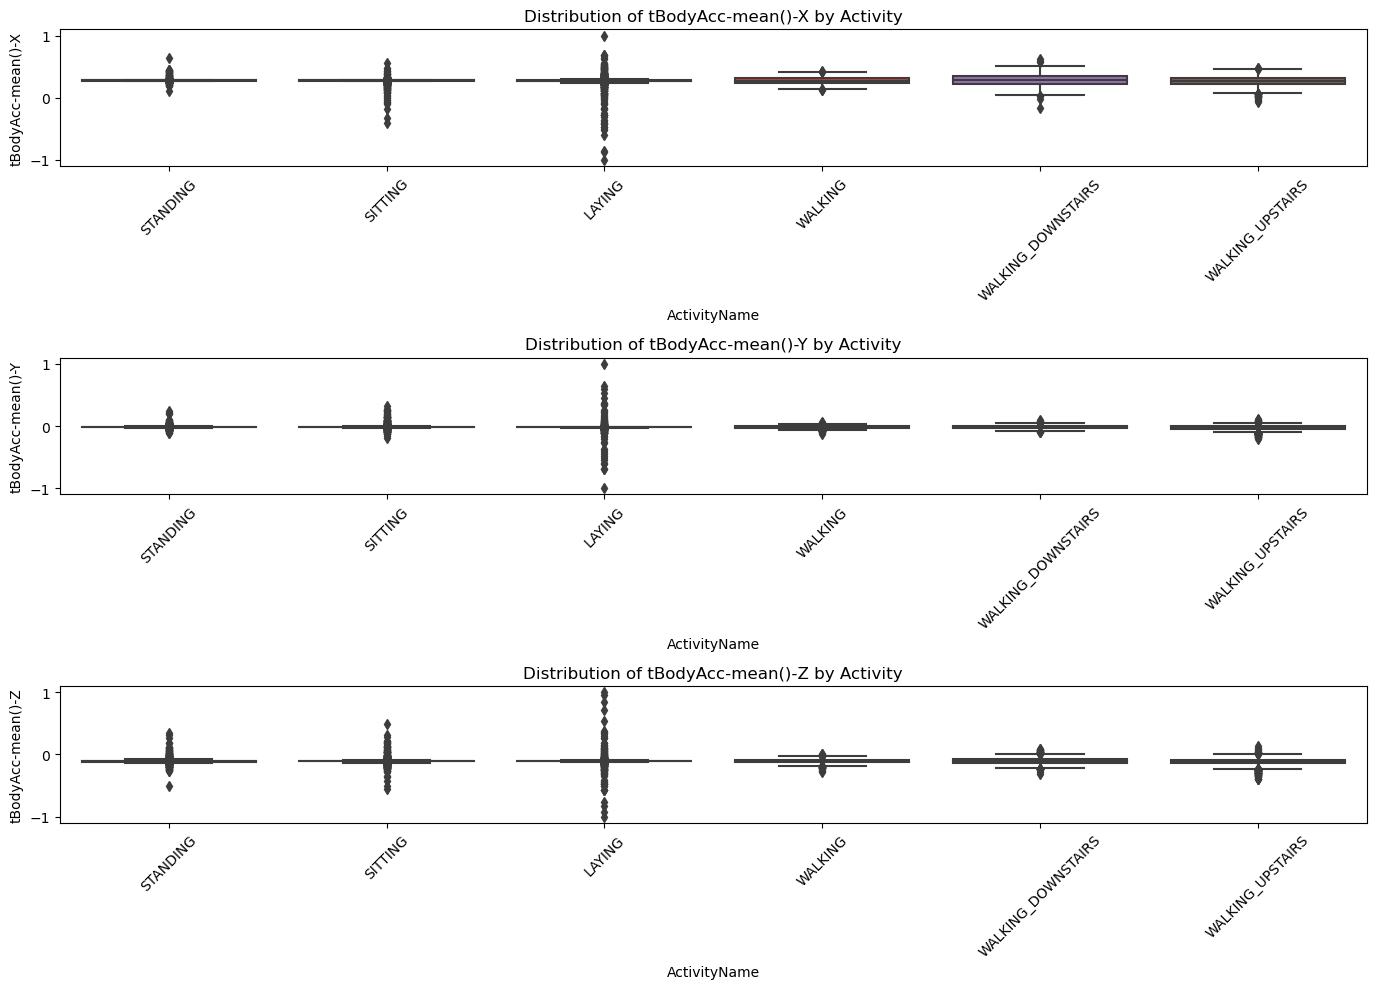

In [272]:
# Distribution of few features
# Select a few features to visualize
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Add Activity to the data for visualization
data_with_labels = pd.concat([data[selected_features], labels['ActivityName']], axis=1)

# Plot the distribution of selected features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x='ActivityName', y=feature, data=data_with_labels)
    plt.title(f'Distribution of {feature} by Activity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [273]:
# handling Missing Values in the Dataset
data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [274]:
# Although we can observe above that there are no missing values in the dataset, yet it is good to drop missing values if any
# Handle missing values
data = data.dropna()

In [275]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [276]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 44.2 MB


In [278]:
# Analysing the data 
labels["ActivityName"].value_counts()

ActivityName
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Laying and standing are the widely performed activities 

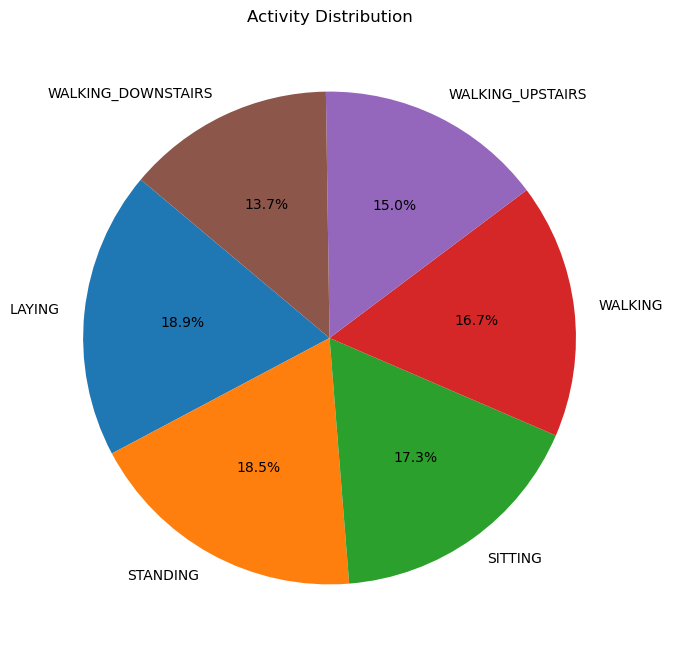

In [279]:
# Pie chart of activity distribution
# Calculate the distribution of each activity
activity_distribution = labels['ActivityName'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(activity_distribution, labels=activity_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Activity Distribution')
plt.show()

In [280]:
# Feature Scaling
# We'll normalize the features to ensure they are on a similar scale. 
# Since the features are already normalized, this step will standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [281]:
# We can observe that there are too many features for this dataset. Applying feature selection technique to remove 
# the features that have low variance and highly correlated.
# Step 1: Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_train_reduced = selector.fit_transform(X_train_scaled)
X_test_reduced = selector.transform(X_test_scaled)


# Step 2:Highly Correlated Features Removel

X_train_reduced_df = pd.DataFrame(X_train_reduced)
corr_matrix = X_train_reduced_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train_reduced_df = X_train_reduced_df.drop(columns=highly_correlated)
X_test_reduced_df = pd.DataFrame(X_test_reduced).drop(columns=highly_correlated)



# Step 3: Application of  Random Forest for Feature Importance
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_reduced_df, Y_train.values.ravel())
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 100  # Adjust this as necessary
important_features = indices[:top_n]

In [282]:
# Reduce the dataset to the top N important features
X_train_final = X_train_reduced_df.iloc[:, important_features]
X_test_final = X_test_reduced_df.iloc[:, important_features]

print(f"Final number of features after all reductions: {X_train_final.shape[1]}")

Final number of features after all reductions: 100


In [353]:
# There is no need of splitting the dataset as the dataset is already divided in training and testing sets.
# Applying machine learning models and sampling techniques

# Initialize a dictionary to store the accuracy scores
accuracy_scores = {
    "Sampling Technique": [],
    "Random Forest": [],
    "LightGBM": [],
    "Deep Learning": []
}

In [354]:
# Function to update the accuracy scores dictionary
def update_accuracy_scores(technique, rf_acc, lgb_acc, dl_acc):
    accuracy_scores["Sampling Technique"].append(technique)
    accuracy_scores["Random Forest"].append(rf_acc)
    accuracy_scores["LightGBM"].append(lgb_acc)
    accuracy_scores["Deep Learning"].append(dl_acc)
    

In [285]:
# Function to evaluate how different models are performing
def evaluate_model(X_train, y_train, X_test, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # ROC-AUC Score
    roc_auc = None
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(df_report)
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC Score: {roc_auc}")
    
    return accuracy, roc_auc

In [286]:
# Applying Hyperparameter Tuning on Random Forest Model
# Initial exploration with Randomized Search CV
# Define a smaller, focused parameter grid
param_dist = {
    'n_estimators': [100, 200],               # Number of trees in the forest
    'max_depth': [10, 20, None],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],         # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with the smaller parameter grid
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                # Reduced number of parameter settings sampled
    cv=3,                     # 3-fold cross-validation for balance between efficiency and robustness
    verbose=2,                # Verbosity level to print detailed results
    random_state=42,          # Set a random seed for reproducibility
    n_jobs=-1                 # Use all available cores
)

# Fit the random search model
random_search_rf.fit(X_train_final, Y_train.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_rf.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [287]:
# Applying Hyperparameter Tuning on Light GBM Model
# Define a smaller, focused parameter grid
param_dist = {
    'num_leaves': [31, 50],                  # Maximum number of leaves in one tree
    'max_depth': [-1, 10, 20],               # Maximum tree depth for base learners (-1 means no limit)
    'learning_rate': [0.05, 0.1],            # Boosting learning rate
    'n_estimators': [100, 200],              # Number of boosting rounds
    'min_child_samples': [20, 50],           # Minimum number of data needed in a child (leaf)
    'subsample': [0.8, 1.0],                 # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0]           # Subsample ratio of columns when constructing each tree
}

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV with the smaller parameter grid
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,                # Reduced number of parameter settings sampled
    cv=3,                     # 3-fold cross-validation for balance between efficiency and robustness
    verbose=2,                # Verbosity level to print detailed results
    random_state=42,          # Set a random seed for reproducibility
    n_jobs=-1                 # Use all available cores
)

# Fit the random search model
random_search_lgbm.fit(X_train_final, Y_train.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_lgbm.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23918
[LightGBM] [Info] Number of data points in the train set: 4901, number of used features: 100
[LightGBM] [Info] Start training from score -1.791555
[LightGBM] [Info] Start training from score -1.924912
[LightGBM] [Info] Start training from score -2.007990
[LightGBM] [Info] Start training from score -1.743757
[LightGBM] [Info] S

In [288]:
# Applying Sampling Techniques and Evaluating Models

# Original Data
print("Evaluating on Original Data:")
rf_original_accuracy, rf_original_roc_auc = evaluate_model(X_train_final, Y_train, X_test_final, Y_test, RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= 10, bootstrap= True, random_state =42), "Random Forest")
lgb_original_accuracy, lgb_original_roc_auc = evaluate_model(X_train_final, Y_train, X_test_final, Y_test, lgb.LGBMClassifier(random_state=42, subsample= 0.8, num_leaves= 31, n_estimators= 200, min_child_samples= 50, max_depth= 10, learning_rate= 0.1, colsample_bytree= 0.8)  , "LightGBM")


Evaluating on Original Data:

Random Forest Performance:
              precision    recall  f1-score     support
1              0.901099  0.991935  0.944338   496.00000
2              0.895299  0.889597  0.892439   471.00000
3              0.975936  0.869048  0.919395   420.00000
4              0.919149  0.879837  0.899063   491.00000
5              0.894928  0.928571  0.911439   532.00000
6              1.000000  1.000000  1.000000   537.00000
accuracy       0.929420  0.929420  0.929420     0.92942
macro avg      0.931068  0.926498  0.927779  2947.00000
weighted avg   0.930752  0.929420  0.929149  2947.00000
Accuracy: 0.9294197488971836
ROC-AUC Score: 0.9956669640282332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23932
[LightGBM] [Info] Number of data points in the train set: 7352, number of used features: 100
[LightGBM] [Info] Start traini

In [289]:
# Determine the number of unique classes
num_classes = len(np.unique(Y_train))
num_classes

6

In [290]:
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [1 2 3 4 5 6]


In [291]:

X_train_reshaped = X_train_final.values.reshape(X_train_final.shape[0], X_train_final.shape[1],1)
X_test_reshaped = X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1],1)

In [292]:
# Adjust the input shape to match the 1D data (time steps, features, channels)
# deep learning model
# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Conv1D Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # Second Conv1D Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Third Conv1D Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [293]:
# Determine the number of unique classes
num_classes = len(np.unique(Y_train))

In [294]:
# Define input shape and number of classes
input_shape = (X_train_reshaped.shape[1], 1)  # (time_steps, features)

In [295]:
num_classes

6

In [296]:
input_shape

(100, 1)

In [297]:
# Create the model
cnn_model = create_cnn_model(input_shape, num_classes)

In [298]:
# Summary of the model
cnn_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_33 (Conv1D)              │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 47, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 21, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,982 (933.52 KB)

 Trainable params: 238,982 (933.52 KB)

 Non-trainable params: 0 (0.00 B)

In [299]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history = cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=50, batch_size=64,
                        validation_data=(X_test_reshaped, y_test_encoded),
                        callbacks=[early_stopping], verbose=2)

Epoch 1/50
115/115 - 2s - 14ms/step - accuracy: 0.7271 - loss: 0.6852 - val_accuracy: 0.8755 - val_loss: 0.3074
Epoch 2/50
115/115 - 1s - 9ms/step - accuracy: 0.9068 - loss: 0.2486 - val_accuracy: 0.9070 - val_loss: 0.2309
Epoch 3/50
115/115 - 1s - 9ms/step - accuracy: 0.9339 - loss: 0.1705 - val_accuracy: 0.9145 - val_loss: 0.2246
Epoch 4/50
115/115 - 1s - 9ms/step - accuracy: 0.9501 - loss: 0.1301 - val_accuracy: 0.8996 - val_loss: 0.3068
Epoch 5/50
115/115 - 1s - 9ms/step - accuracy: 0.9540 - loss: 0.1142 - val_accuracy: 0.9094 - val_loss: 0.2419
Epoch 6/50
115/115 - 1s - 9ms/step - accuracy: 0.9596 - loss: 0.0962 - val_accuracy: 0.8945 - val_loss: 0.3094
Epoch 7/50
115/115 - 1s - 9ms/step - accuracy: 0.9691 - loss: 0.0780 - val_accuracy: 0.9237 - val_loss: 0.2475
Epoch 8/50
115/115 - 1s - 9ms/step - accuracy: 0.9752 - loss: 0.0636 - val_accuracy: 0.9165 - val_loss: 0.2550
Epoch 9/50
115/115 - 1s - 9ms/step - accuracy: 0.9766 - loss: 0.0603 - val_accuracy: 0.9311 - val_loss: 0.2272


In [300]:
# Plotting the accuracy and loss curves
def plot_training_curves(history):
    # Accuracy Curves
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Curves
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

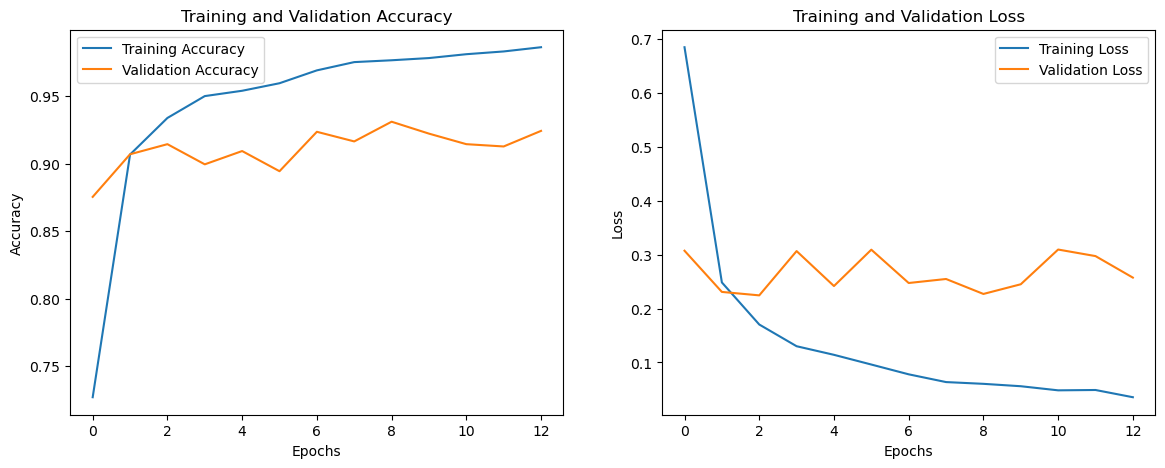

In [301]:
# Call the function to plot the curves
plot_training_curves(history)

In [302]:
# Note to be added about the interpretation of graph.

In [303]:
# CNN on Original Data
print("\nEvaluating CNN Model on Original Data:")
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy: {cnn_accuracy}")


Evaluating CNN Model on Original Data:
CNN Model Accuracy: 0.9144893288612366


In [355]:
# Original Data
update_accuracy_scores("Original Data", rf_original_accuracy, lgb_original_accuracy, cnn_accuracy)

In [305]:
# Applying Sampling Techniques
# SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, Y_train)

In [306]:
# Hyperparameter Tuning for Random Forest for the oversampled data
# Fit the random search model
random_search_rf.fit(X_train_smote, y_train_smote.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_rf.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [307]:
# Hyperparameter Tuning for Light GBM for the oversampled data.
# Fit the random search model
random_search_lgbm.fit(X_train_smote, y_train_smote.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_lgbm.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   6.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23923
[LightGBM] [Info] Number of data points in the train set

In [308]:
print("\nEvaluating after SMOTE Oversampling:")
rf_smote_accuracy, rf_smote_roc_auc = evaluate_model(X_train_smote, y_train_smote, X_test_final, Y_test, RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False), "Random Forest with SMOTE")
lgb_smote_accuracy, lgb_smote_roc_auc = evaluate_model(X_train_smote, y_train_smote, X_test_final, Y_test, lgb.LGBMClassifier(random_state=42,subsample= 0.8, num_leaves= 31, n_estimators= 200, min_child_samples= 50, max_depth= 10, learning_rate= 0.1, colsample_bytree = 0.8 ), "LightGBM with SMOTE")



Evaluating after SMOTE Oversampling:

Random Forest with SMOTE Performance:
              precision    recall  f1-score      support
1              0.921201  0.989919  0.954325   496.000000
2              0.908316  0.904459  0.906383   471.000000
3              0.976684  0.897619  0.935484   420.000000
4              0.918239  0.892057  0.904959   491.000000
5              0.904587  0.926692  0.915506   532.000000
6              1.000000  1.000000  1.000000   537.000000
accuracy       0.937224  0.937224  0.937224     0.937224
macro avg      0.938171  0.935124  0.936109  2947.000000
weighted avg   0.937915  0.937224  0.937068  2947.000000
Accuracy: 0.9372242958941296
ROC-AUC Score: 0.996328478778837
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25388
[LightGBM] [Info] Number of data points in the train set: 8442, number of used features: 100
[

In [309]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smote = X_train_smote.values.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_cnn = X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)


In [310]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smote_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(Y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [1 2 3 4 5 6]


In [311]:
cnn_model_smote = create_cnn_model(X_train_cnn_smote.shape[1:], num_classes)

In [312]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history_smote = cnn_model_smote.fit(X_train_cnn_smote, y_train_smote_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
132/132 - 2s - 16ms/step - accuracy: 0.7531 - loss: 0.6050 - val_accuracy: 0.8690 - val_loss: 0.3184
Epoch 2/50
132/132 - 1s - 9ms/step - accuracy: 0.9237 - loss: 0.1994 - val_accuracy: 0.8914 - val_loss: 0.2671
Epoch 3/50
132/132 - 1s - 9ms/step - accuracy: 0.9434 - loss: 0.1426 - val_accuracy: 0.9165 - val_loss: 0.2130
Epoch 4/50
132/132 - 1s - 9ms/step - accuracy: 0.9533 - loss: 0.1148 - val_accuracy: 0.8989 - val_loss: 0.2613
Epoch 5/50
132/132 - 1s - 9ms/step - accuracy: 0.9583 - loss: 0.1050 - val_accuracy: 0.9186 - val_loss: 0.2270
Epoch 6/50
132/132 - 1s - 10ms/step - accuracy: 0.9646 - loss: 0.0835 - val_accuracy: 0.9209 - val_loss: 0.2230
Epoch 7/50
132/132 - 1s - 9ms/step - accuracy: 0.9722 - loss: 0.0716 - val_accuracy: 0.9240 - val_loss: 0.2210
Epoch 8/50
132/132 - 1s - 9ms/step - accuracy: 0.9762 - loss: 0.0629 - val_accuracy: 0.9335 - val_loss: 0.1916
Epoch 9/50
132/132 - 1s - 9ms/step - accuracy: 0.9790 - loss: 0.0524 - val_accuracy: 0.9240 - val_loss: 0.2482

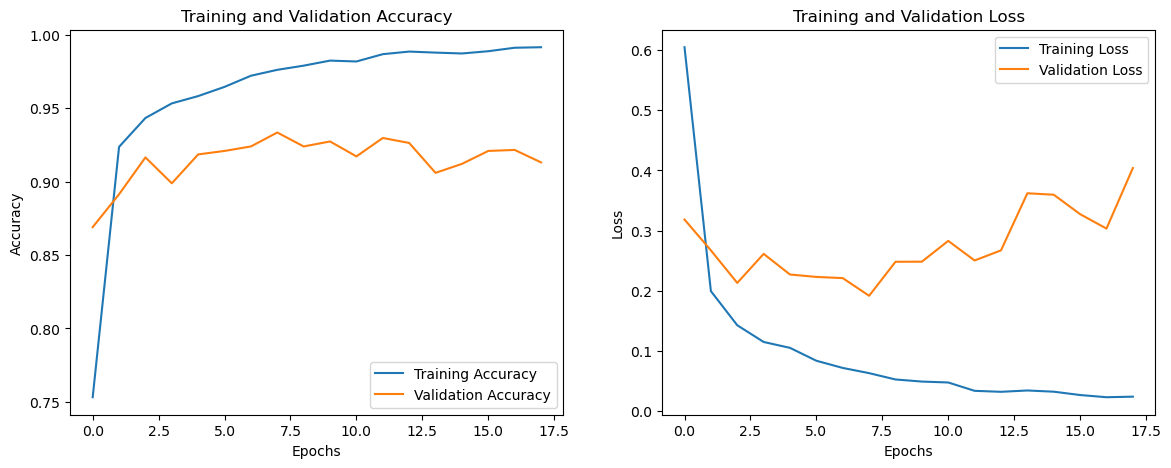

In [313]:
plot_training_curves(history_smote)

In [314]:
# deep learning model
# CNN on SMOTE-oversampled Data
print("\nEvaluating CNN Model on SMOTE Data:")
#cnn_model_smote.fit(X_train_cnn_smote, y_train_smote_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smote_loss, cnn_smote_accuracy = cnn_model_smote.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTE: {cnn_smote_accuracy}")


Evaluating CNN Model on SMOTE Data:
CNN Model Accuracy with SMOTE: 0.9334917068481445


In [356]:
# SMOTE (Oversampling)
update_accuracy_scores("SMOTE", rf_smote_accuracy, lgb_smote_accuracy, cnn_smote_accuracy)

In [316]:
#Performing Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_final, Y_train)

In [317]:
# Hyperparameter Tuning for Random Forest for the undersampled data
# Fit the random search model
random_search_rf.fit(X_train_rus, y_train_rus.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_rf.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [318]:
# Hyperparameter Tuning for Light GBM for the undersampled data.
# Fit the random search model
random_search_lgbm.fit(X_train_rus, y_train_rus.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_lgbm.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Start training from score -1.924912
[LightGBM] [Info] Start training from score -2.007990
[LightGBM] [Info] Start training from score -1.743757
[LightGBM] [Info] Start training from score -1.677178
[LightGBM] [Info] Start training from score -1.653445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, min_child_samples=50, n_estimators=100, num_leaves=31, subsample=1.0; total time=  25.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_

In [319]:
print("\nEvaluating after Undersampling:")
rf_rus_accuracy, rf_rus_roc_auc = evaluate_model(X_train_rus, y_train_rus, X_test_final, Y_test, RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False), "Random Forest with Oversampling")
lgb_rus_accuracy, lgb_rus_roc_auc = evaluate_model(X_train_rus, y_train_rus, X_test_final, Y_test, lgb.LGBMClassifier(random_state=42,subsample= 0.8, num_leaves= 31, n_estimators= 200, min_child_samples= 50, max_depth= 10, learning_rate= 0.1, colsample_bytree = 0.8 ), "LightGBM with Oversampling")



Evaluating after Undersampling:

Random Forest with Oversampling Performance:
              precision    recall  f1-score      support
1              0.926136  0.985887  0.955078   496.000000
2              0.913793  0.900212  0.906952   471.000000
3              0.964646  0.909524  0.936275   420.000000
4              0.911523  0.902240  0.906858   491.000000
5              0.912313  0.919173  0.915730   532.000000
6              1.000000  1.000000  1.000000   537.000000
accuracy       0.937903  0.937903  0.937903     0.937903
macro avg      0.938069  0.936173  0.936815  2947.000000
weighted avg   0.938181  0.937903  0.937755  2947.000000
Accuracy: 0.9379029521547336
ROC-AUC Score: 0.9963690737989118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23926
[LightGBM] [Info] Number of data points in the train set: 5916, number of used features: 10

In [320]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_rus = X_train_rus.values.reshape(X_train_rus.shape[0], X_train_rus.shape[1], 1)
X_test_cnn = X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

In [321]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_rus_encoded = label_encoder.fit_transform(y_train_rus)
y_test_encoded = label_encoder.transform(Y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [1 2 3 4 5 6]


In [322]:
cnn_model_rus = create_cnn_model(X_train_cnn_rus.shape[1:], num_classes)

In [323]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history_rus = cnn_model_rus.fit(X_train_cnn_rus, y_train_rus_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
93/93 - 1s - 15ms/step - accuracy: 0.7055 - loss: 0.7300 - val_accuracy: 0.8792 - val_loss: 0.3301
Epoch 2/50
93/93 - 1s - 9ms/step - accuracy: 0.8999 - loss: 0.2708 - val_accuracy: 0.8870 - val_loss: 0.2582
Epoch 3/50
93/93 - 1s - 9ms/step - accuracy: 0.9282 - loss: 0.1818 - val_accuracy: 0.8985 - val_loss: 0.2678
Epoch 4/50
93/93 - 1s - 9ms/step - accuracy: 0.9444 - loss: 0.1460 - val_accuracy: 0.9135 - val_loss: 0.2206
Epoch 5/50
93/93 - 1s - 9ms/step - accuracy: 0.9483 - loss: 0.1235 - val_accuracy: 0.9128 - val_loss: 0.2292
Epoch 6/50
93/93 - 1s - 9ms/step - accuracy: 0.9542 - loss: 0.1106 - val_accuracy: 0.9063 - val_loss: 0.2509
Epoch 7/50
93/93 - 1s - 9ms/step - accuracy: 0.9557 - loss: 0.0993 - val_accuracy: 0.9162 - val_loss: 0.2382
Epoch 8/50
93/93 - 1s - 9ms/step - accuracy: 0.9652 - loss: 0.0840 - val_accuracy: 0.9128 - val_loss: 0.2627
Epoch 9/50
93/93 - 1s - 10ms/step - accuracy: 0.9642 - loss: 0.0900 - val_accuracy: 0.9182 - val_loss: 0.2304
Epoch 10/50
93/93

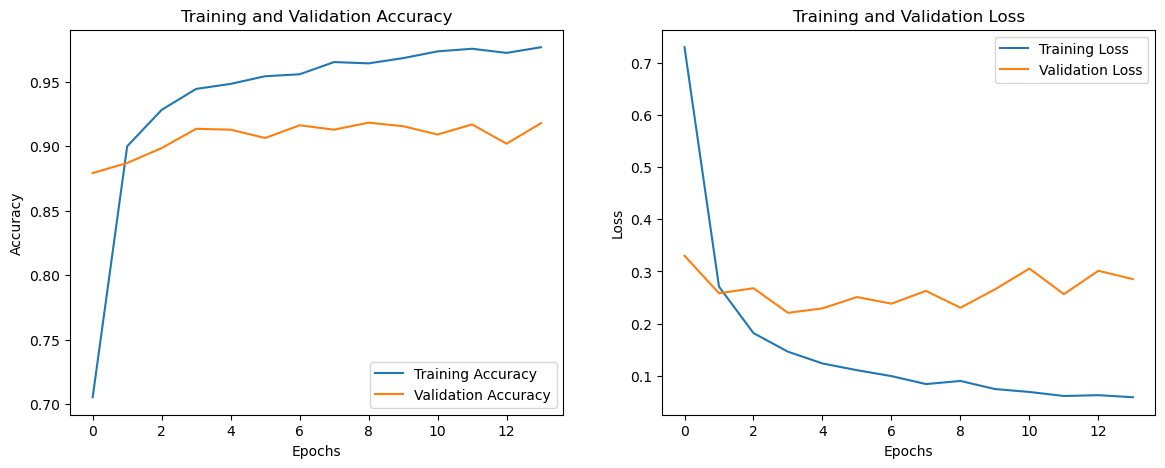

In [324]:
plot_training_curves(history_rus)

In [325]:
# deep learning model
# CNN on Random Undersampled Data
print("\nEvaluating CNN Model on Random Undersampled Data:")
#cnn_model_rus = create_cnn_model(X_train_cnn_rus.shape[1:], num_classes)
#cnn_model_rus.fit(X_train_cnn_rus, y_train_rus_encoded, epochs=10, batch_size=64, verbose=0)
cnn_rus_loss, cnn_rus_accuracy = cnn_model_rus.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with Random Undersampling: {cnn_rus_accuracy}")


Evaluating CNN Model on Random Undersampled Data:
CNN Model Accuracy with Random Undersampling: 0.9134713411331177


In [357]:
# Random Undersampling
update_accuracy_scores("Random Undersampling", rf_rus_accuracy, lgb_rus_accuracy, cnn_rus_accuracy)

In [327]:
# Hybrid Sampling Technique (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_final, Y_train)

In [328]:
# Hyperparameter Tuning for Random Forest after applying Hybrid Sampling
# Fit the random search model
random_search_rf.fit(X_train_smoteenn, y_train_smoteenn.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_rf.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [329]:
# Hyperparameter Tuning for Light GBM after applying Hybrid Sampling.
# Fit the random search model
random_search_lgbm.fit(X_train_smoteenn, y_train_smoteenn.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_lgbm.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [330]:
print("\nEvaluating after SMOTEENN (Hybrid Sampling):")
rf_smoteenn_accuracy, rf_smoteenn_roc_auc = evaluate_model(X_train_smoteenn, y_train_smoteenn, X_test_final, Y_test, RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False), "Random Forest with Hybridsampling")
lgb_smoteenn_accuracy, lgb_smoteenn_roc_auc = evaluate_model(X_train_smoteenn, y_train_smoteenn, X_test_final, Y_test, lgb.LGBMClassifier(random_state=42,subsample= 0.8, num_leaves= 31, n_estimators= 200, min_child_samples= 50, max_depth= 10, learning_rate= 0.1, colsample_bytree = 0.8 ), "LightGBM with Hybridsampling")



Evaluating after SMOTEENN (Hybrid Sampling):

Random Forest with Hybridsampling Performance:
              precision    recall  f1-score      support
1              0.917910  0.991935  0.953488   496.000000
2              0.901709  0.895966  0.898829   471.000000
3              0.971354  0.888095  0.927861   420.000000
4              0.915584  0.861507  0.887723   491.000000
5              0.880357  0.926692  0.902930   532.000000
6              1.000000  1.000000  1.000000   537.000000
accuracy       0.929759  0.929759  0.929759     0.929759
macro avg      0.931153  0.927366  0.928472  2947.000000
weighted avg   0.930729  0.929759  0.929491  2947.000000
Accuracy: 0.9297590770274856
ROC-AUC Score: 0.9958445067471445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25400
[LightGBM] [Info] Number of data points in the train set: 7614, number of us

In [331]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smoteenn = X_train_smoteenn.values.reshape(X_train_smoteenn.shape[0], X_train_smoteenn.shape[1], 1)
X_test_cnn = X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

In [332]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smoteenn_encoded = label_encoder.fit_transform(y_train_smoteenn)
y_test_encoded = label_encoder.transform(Y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [1 2 3 4 5 6]


In [333]:
cnn_model_smoteenn = create_cnn_model(X_train_cnn_smoteenn.shape[1:], num_classes)

In [334]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history_smoteenn = cnn_model_smoteenn.fit(X_train_cnn_smoteenn, y_train_smoteenn_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
119/119 - 2s - 13ms/step - accuracy: 0.7514 - loss: 0.6400 - val_accuracy: 0.8694 - val_loss: 0.3256
Epoch 2/50
119/119 - 1s - 8ms/step - accuracy: 0.9401 - loss: 0.1713 - val_accuracy: 0.8989 - val_loss: 0.2432
Epoch 3/50
119/119 - 1s - 8ms/step - accuracy: 0.9631 - loss: 0.1009 - val_accuracy: 0.9036 - val_loss: 0.2482
Epoch 4/50
119/119 - 1s - 9ms/step - accuracy: 0.9699 - loss: 0.0763 - val_accuracy: 0.8853 - val_loss: 0.3310
Epoch 5/50
119/119 - 1s - 9ms/step - accuracy: 0.9790 - loss: 0.0587 - val_accuracy: 0.9175 - val_loss: 0.2381
Epoch 6/50
119/119 - 1s - 9ms/step - accuracy: 0.9838 - loss: 0.0465 - val_accuracy: 0.8799 - val_loss: 0.4114
Epoch 7/50
119/119 - 1s - 9ms/step - accuracy: 0.9848 - loss: 0.0436 - val_accuracy: 0.9013 - val_loss: 0.3497
Epoch 8/50
119/119 - 1s - 9ms/step - accuracy: 0.9879 - loss: 0.0362 - val_accuracy: 0.9070 - val_loss: 0.2804
Epoch 9/50
119/119 - 1s - 9ms/step - accuracy: 0.9891 - loss: 0.0305 - val_accuracy: 0.9050 - val_loss: 0.3060


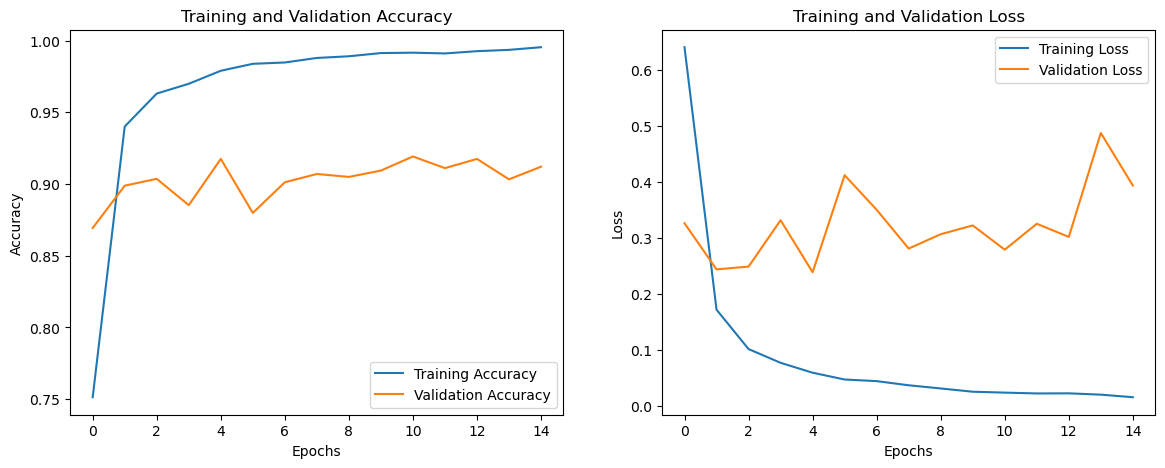

In [335]:
plot_training_curves(history_smoteenn)

In [336]:
# deep learning model
# CNN on SMOTEENN Data
print("\nEvaluating CNN Model on SMOTEENN Data:")
#cnn_model_smoteenn = create_cnn_model(X_train_cnn_smoteenn.shape[1:], num_classes)
#cnn_model_smoteenn.fit(X_train_cnn_smoteenn, y_train_smoteenn_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smoteenn_loss, cnn_smoteenn_accuracy = cnn_model_smoteenn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTEENN: {cnn_smoteenn_accuracy}")


Evaluating CNN Model on SMOTEENN Data:
CNN Model Accuracy with SMOTEENN: 0.9175432920455933


In [358]:
# SMOTEENN (Hybrid Sampling)
update_accuracy_scores("SMOTEENN", rf_smoteenn_accuracy, lgb_smoteenn_accuracy, cnn_smoteenn_accuracy)

In [338]:
# Hybrid Sampling Technique (SMOTETomek)
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_final, Y_train)

In [339]:
# Hyperparameter Tuning for Random Forest after applying Hybrid Sampling
# Fit the random search model
random_search_rf.fit(X_train_smotetomek, y_train_smotetomek.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_rf.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nehadudeja/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [340]:
# Hyperparameter Tuning for Light GBM after applying Hybrid Sampling.
# Fit the random search model
random_search_lgbm.fit(X_train_smotetomek, y_train_smotetomek.values.ravel())

# Print the best parameters from RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search_lgbm.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [341]:
print("\nEvaluating after SMOTETomek (Hybrid Sampling):")
rf_smotetomek_accuracy, rf_smotetomek_roc_auc = evaluate_model(X_train_smotetomek, y_train_smotetomek, X_test_final, Y_test, RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False), "Random Forest with Hybridsampling")
lgb_smotetomek_accuracy, lgb_smotetomek_roc_auc = evaluate_model(X_train_smotetomek, y_train_smotetomek, X_test_final, Y_test, lgb.LGBMClassifier(random_state=42,subsample= 0.8, num_leaves= 31, n_estimators= 200, min_child_samples= 50, max_depth= 10, learning_rate= 0.1, colsample_bytree = 0.8 ), "LightGBM with Hybridsampling")



Evaluating after SMOTETomek (Hybrid Sampling):

Random Forest with Hybridsampling Performance:
              precision    recall  f1-score     support
1              0.921348  0.991935  0.955340   496.00000
2              0.907527  0.895966  0.901709   471.00000
3              0.966581  0.895238  0.929543   420.00000
4              0.915789  0.885947  0.900621   491.00000
5              0.899452  0.924812  0.911956   532.00000
6              1.000000  1.000000  1.000000   537.00000
accuracy       0.934510  0.934510  0.934510     0.93451
macro avg      0.935116  0.932316  0.933195  2947.00000
weighted avg   0.935039  0.934510  0.934281  2947.00000
Accuracy: 0.9345096708517137
ROC-AUC Score: 0.9962687793159731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25390
[LightGBM] [Info] Number of data points in the train set: 8404, number of used featu

In [342]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smotetomek = X_train_smotetomek.values.reshape(X_train_smotetomek.shape[0], X_train_smotetomek.shape[1], 1)
X_test_cnn = X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

In [343]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smotetomek_encoded = label_encoder.fit_transform(y_train_smotetomek)
y_test_encoded = label_encoder.transform(Y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [1 2 3 4 5 6]


In [344]:
cnn_model_smotetomek = create_cnn_model(X_train_cnn_smotetomek.shape[1:], num_classes)

In [345]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history_smotetomek = cnn_model_smotetomek.fit(X_train_cnn_smotetomek, y_train_smotetomek_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
132/132 - 2s - 12ms/step - accuracy: 0.7567 - loss: 0.6163 - val_accuracy: 0.8962 - val_loss: 0.2758
Epoch 2/50
132/132 - 1s - 9ms/step - accuracy: 0.9227 - loss: 0.2103 - val_accuracy: 0.8945 - val_loss: 0.2924
Epoch 3/50
132/132 - 1s - 9ms/step - accuracy: 0.9419 - loss: 0.1504 - val_accuracy: 0.9046 - val_loss: 0.2783
Epoch 4/50
132/132 - 1s - 9ms/step - accuracy: 0.9520 - loss: 0.1191 - val_accuracy: 0.9131 - val_loss: 0.2386
Epoch 5/50
132/132 - 1s - 9ms/step - accuracy: 0.9578 - loss: 0.1040 - val_accuracy: 0.9220 - val_loss: 0.2096
Epoch 6/50
132/132 - 1s - 8ms/step - accuracy: 0.9648 - loss: 0.0885 - val_accuracy: 0.9128 - val_loss: 0.2783
Epoch 7/50
132/132 - 1s - 9ms/step - accuracy: 0.9700 - loss: 0.0748 - val_accuracy: 0.9080 - val_loss: 0.2893
Epoch 8/50
132/132 - 1s - 9ms/step - accuracy: 0.9722 - loss: 0.0748 - val_accuracy: 0.9172 - val_loss: 0.2774
Epoch 9/50
132/132 - 1s - 9ms/step - accuracy: 0.9785 - loss: 0.0580 - val_accuracy: 0.9199 - val_loss: 0.2818


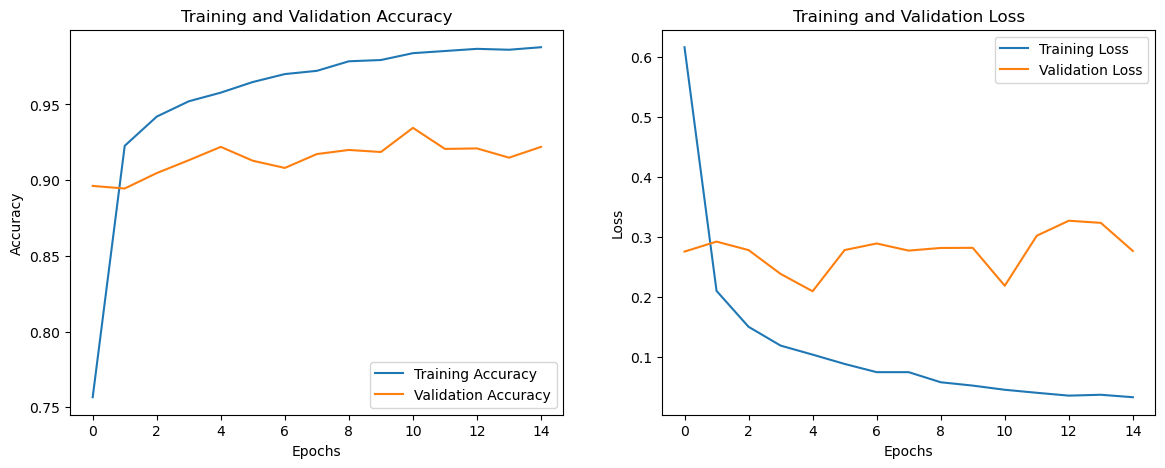

In [346]:
plot_training_curves(history_smotetomek)

In [347]:
# deep learning model
# CNN on SMOTETomek Data
print("\nEvaluating CNN Model on SMOTETomek Data:")
#cnn_model_smotetomek = create_cnn_model(X_train_cnn_smotetomek.shape[1:], num_classes)
#cnn_model_smotetomek.fit(X_train_cnn_smotetomek, y_train_smotetomek_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smotetomek_loss, cnn_smotetomek_accuracy = cnn_model_smotetomek.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTETomek: {cnn_smotetomek_accuracy}")


Evaluating CNN Model on SMOTETomek Data:
CNN Model Accuracy with SMOTETomek: 0.9219545125961304


In [359]:
# SMOTETomek (Hybrid Sampling)
update_accuracy_scores("SMOTETomek", rf_smotetomek_accuracy, lgb_smotetomek_accuracy, cnn_smotetomek_accuracy)

In [350]:
print(accuracy_scores)

{'Sampling Technique': ['Original Data', 'SMOTE', 'Random Undersampling', 'SMOTEENN', 'SMOTETomek'], 'Random Forest': [0.9294197488971836, 0.9372242958941296, 0.9379029521547336, 0.9297590770274856, 0.9345096708517137], 'SVM': [], 'LightGBM': [0.9453681710213777, 0.9470648116728877, 0.9477434679334917, 0.9402782490668476, 0.9474041398031897], 'Deep Learning': [0.9144893288612366, 0.9334917068481445, 0.9134713411331177, 0.9175432920455933, 0.9219545125961304]}


In [361]:

# Create a DataFrame from the accuracy scores dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the accuracy scores table
print("Accuracy Scores for Each Sampling Technique and Model:")
print(accuracy_df)

Accuracy Scores for Each Sampling Technique and Model:
     Sampling Technique  Random Forest  LightGBM  Deep Learning
0         Original Data       0.929420  0.945368       0.914489
1                 SMOTE       0.937224  0.947065       0.933492
2  Random Undersampling       0.937903  0.947743       0.913471
3              SMOTEENN       0.929759  0.940278       0.917543
4            SMOTETomek       0.934510  0.947404       0.921955
